        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp

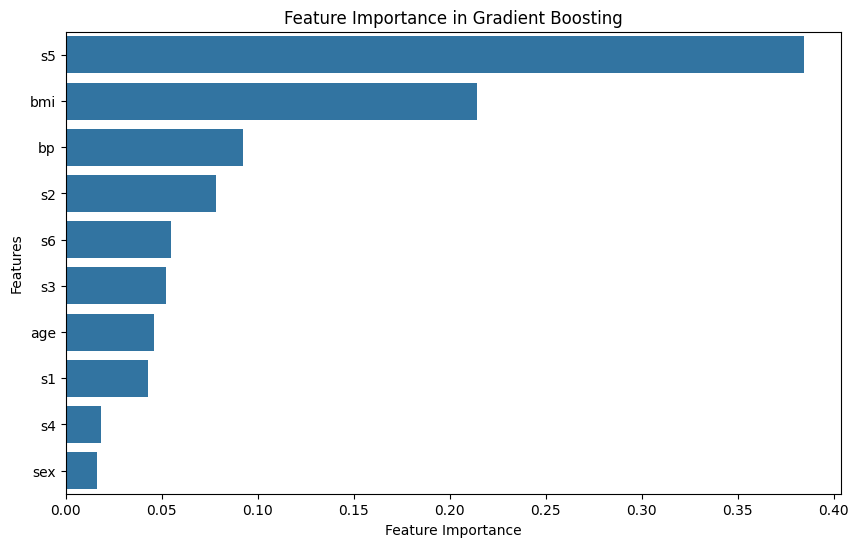

AttributeError: 'GradientBoostingRegressor' object has no attribute 'loss_'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Step 1: Load the Diabetes dataset
data = datasets.load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Step 2: Check data (no nulls, all numeric)
print(df.head())
print(df.info())  # All float64, no missing values
print(df.duplicated().sum())  # No duplicates

# Step 3: Split into features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 5: Train Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, random_state=0)
gbr.fit(X_train, y_train)

# Step 6: Make predictions and evaluate
y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")  # Example: ~52.18 (high, needs tuning)

# Step 7: Feature importance
feature_scores = pd.Series(gbr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_scores)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting')
plt.show()

# Step 8: Plot deviance (how well model fits)
test_scores = np.zeros(500, dtype=np.float64)
for i, y_pred_iter in enumerate(gbr.staged_predict(X_test)):
    test_scores[i] = gbr.loss_(y_test, y_pred_iter)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(500) + 1, gbr.train_score_, 'b-', label='Training Deviance')
plt.plot(np.arange(500) + 1, test_scores, 'r-', label='Test Deviance')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance (Error)')
plt.title('Training vs Test Deviance')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

📌 STEP 1: LOADING DATASET

First 5 rows of the dataset:

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9140\3206756291.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_scores, y=feature_scores.index, palette="viridis")


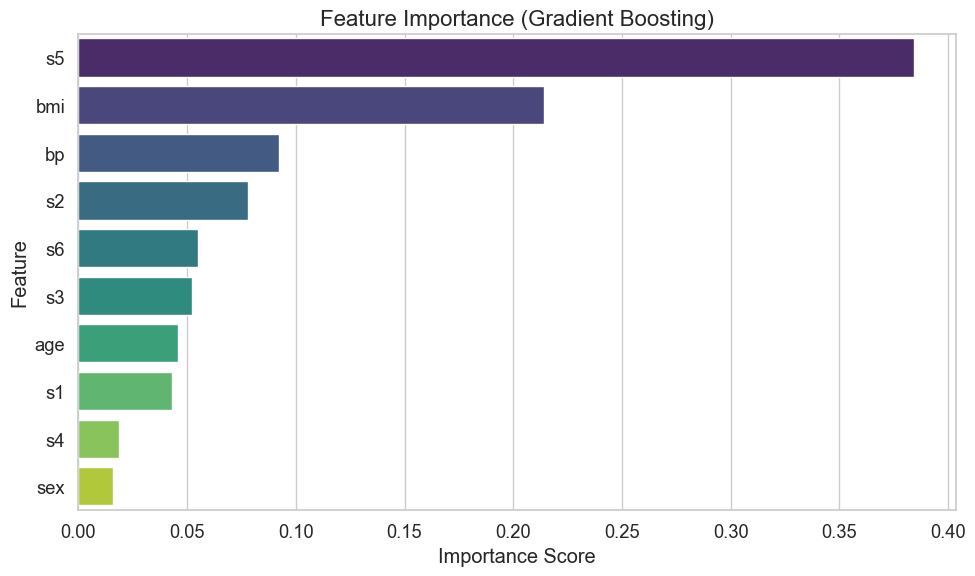


📌 STEP 6: TRAINING VS TEST DEVIANCE


AttributeError: 'GradientBoostingRegressor' object has no attribute 'loss_'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

sns.set(style="whitegrid", font_scale=1.2)

print("="*70)
print("📌 STEP 1: LOADING DATASET")
print("="*70)

# Load the Diabetes dataset
data = datasets.load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

print("\nFirst 5 rows of the dataset:\n")
print(df.head())

print("\nDataset Info:\n")
print(df.info())

print("\nTotal Duplicate Rows:", df.duplicated().sum())

print("\n" + "="*70)
print("📌 STEP 2: TRAIN–TEST SPLIT")
print("="*70)

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

print("\n" + "="*70)
print("📌 STEP 3: TRAINING MODEL (Gradient Boosting)")
print("="*70)

gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, random_state=0)
gbr.fit(X_train, y_train)

print("Model training completed.")

print("\n" + "="*70)
print("📌 STEP 4: MODEL EVALUATION")
print("="*70)

y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

print("\n" + "="*70)
print("📌 STEP 5: FEATURE IMPORTANCE")
print("="*70)

feature_scores = pd.Series(gbr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores, y=feature_scores.index, palette="viridis")
plt.title("Feature Importance (Gradient Boosting)", fontsize=16)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("📌 STEP 6: TRAINING VS TEST DEVIANCE")
print("="*70)

test_scores = np.zeros(500, dtype=np.float64)
for i, y_pred_iter in enumerate(gbr.staged_predict(X_test)):
    test_scores[i] = gbr.loss_(y_test, y_pred_iter)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 501), gbr.train_score_, label="Training Deviance", linewidth=2)
plt.plot(np.arange(1, 501), test_scores, label="Test Deviance", linewidth=2)
plt.title("Training vs Test Deviance Curve", fontsize=16)
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance (Error)")
plt.legend()
plt.tight_layout()
plt.show()

print("\n🎉 All steps completed successfully!")



📌 STEP 1: LOADING AND INSPECTING THE DIABETES DATASET
The Diabetes dataset contains 10 numerical features and a continuous target variable.

Preview of the dataset (first 5 rows):

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Dataset Information (column types, non-null counts):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entrie

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9140\2495012287.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_scores, y=feature_scores.index, palette="viridis")


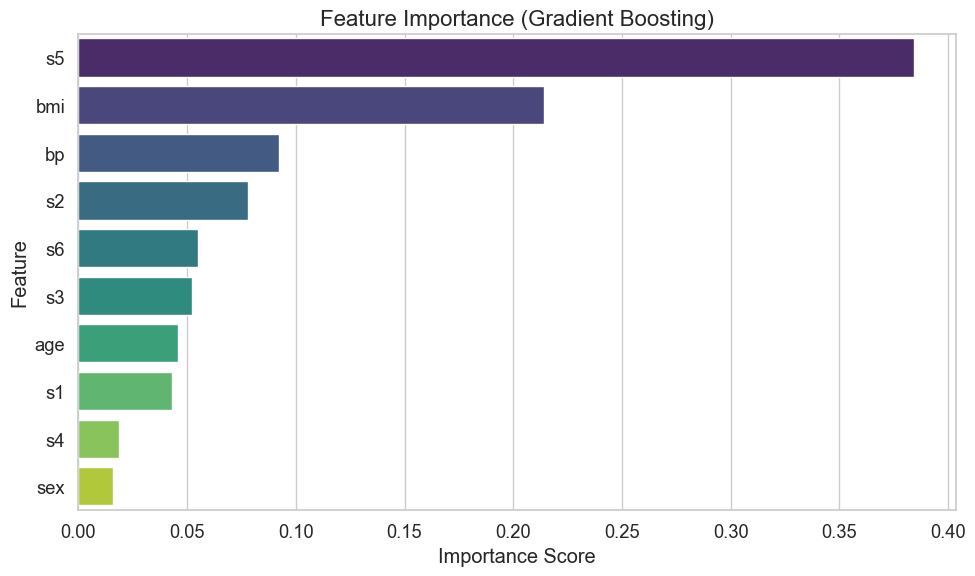


📌 STEP 6: MODEL LEARNING ANALYSIS — DEVIANCE CURVE
This plot compares training error vs test error over all boosting iterations.
If test error increases while training error decreases → the model is overfitting.



AttributeError: 'GradientBoostingRegressor' object has no attribute 'loss_'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

sns.set(style="whitegrid", font_scale=1.2)

def section(title):
    print("\n" + "="*80)
    print(f"📌 {title}")
    print("="*80)

# --------------------------------------------------------
# STEP 1 — LOAD AND INSPECT DATASET
# --------------------------------------------------------
section("STEP 1: LOADING AND INSPECTING THE DIABETES DATASET")

data = datasets.load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

print("The Diabetes dataset contains 10 numerical features and a continuous target variable.")
print("\nPreview of the dataset (first 5 rows):\n")
print(df.head())

print("\nDataset Information (column types, non-null counts):\n")
print(df.info())

print("\nChecking for duplicate rows...")
print(f"Total Duplicate Rows: {df.duplicated().sum()}")

# --------------------------------------------------------
# STEP 2 — SPLIT INTO TRAINING & TEST SETS
# --------------------------------------------------------
section("STEP 2: TRAIN–TEST SPLIT")

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print(f"Total Samples: {len(df)}")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")
print("\nWe will use 80% data for training and 20% for testing.")

# --------------------------------------------------------
# STEP 3 — TRAIN THE MODEL
# --------------------------------------------------------
section("STEP 3: TRAINING THE GRADIENT BOOSTING MODEL")

gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    random_state=0
)
gbr.fit(X_train, y_train)

print("Gradient Boosting Regressor successfully trained using 500 decision trees.")
print("Learning rate is set to 0.1.")

# --------------------------------------------------------
# STEP 4 — MODEL EVALUATION
# --------------------------------------------------------
section("STEP 4: MODEL EVALUATION USING MEAN ABSOLUTE ERROR (MAE)")

y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE tells how far our predictions are from the actual values on average.")
print(f"\n➡️ Mean Absolute Error (MAE): {mae:.2f}")
print("\nLower MAE = Better model performance.")

# --------------------------------------------------------
# STEP 5 — FEATURE IMPORTANCE
# --------------------------------------------------------
section("STEP 5: FEATURE IMPORTANCE ANALYSIS")

feature_scores = pd.Series(gbr.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("Feature importance shows which features contribute most to model predictions.\n")
print("Higher the value → More important the feature.\n")
print(feature_scores)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores, y=feature_scores.index, palette="viridis")
plt.title("Feature Importance (Gradient Boosting)", fontsize=16)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# STEP 6 — TRAINING VS TEST DEVIANCE PLOT
# --------------------------------------------------------
section("STEP 6: MODEL LEARNING ANALYSIS — DEVIANCE CURVE")

print("This plot compares training error vs test error over all boosting iterations.")
print("If test error increases while training error decreases → the model is overfitting.\n")

test_scores = np.zeros(500, dtype=np.float64)
for i, y_pred_iter in enumerate(gbr.staged_predict(X_test)):
    test_scores[i] = gbr.loss_(y_test, y_pred_iter)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 501), gbr.train_score_, label="Training Deviance", linewidth=2)
plt.plot(np.arange(1, 501), test_scores, label="Test Deviance", linewidth=2)
plt.title("Training vs Test Deviance Curve", fontsize=16)
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance (Error)")
plt.legend()
plt.tight_layout()
plt.show()

section("🎉 REPORT COMPLETE")
print("All steps executed successfully. This concludes the complete ML workflow report.")



📌 STEP 1: DATA INSPECTION
Dataset preview (first 5 rows):
      age       sex       bmi        bp        s1        s2        s3        s4        s5        s6  Target
 0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401 -0.002592  0.019907 -0.017646   151.0
-0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412 -0.039493 -0.068332 -0.092204    75.0
 0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356 -0.002592  0.002861 -0.025930   141.0
-0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038  0.034309  0.022688 -0.009362   206.0
 0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142 -0.002592 -0.031988 -0.046641   135.0

Summary:
        count          mean        std        min        25%         50%  \
age     442.0 -2.511817e-19   0.047619  -0.107226  -0.037299    0.005383   
sex     442.0  1.230790e-17   0.047619  -0.044642  -0.044642   -0.044642   
bmi     442.0 -2.245564e-16   0.047619  -0.090275  -0.0

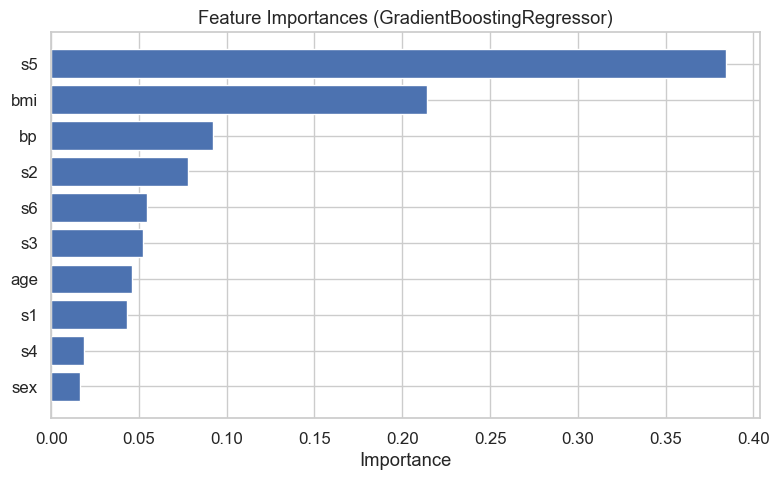


📌 STEP 6: PERMUTATION IMPORTANCE (OPTIONAL BUT RECOMMENDED)
Permutation importance (mean over repeats):
s5     0.179188
bmi    0.107320
bp     0.060202
age    0.047160
sex    0.028838
s3     0.008077
s4     0.006338
s6    -0.002546
s2    -0.005619
s1    -0.026557


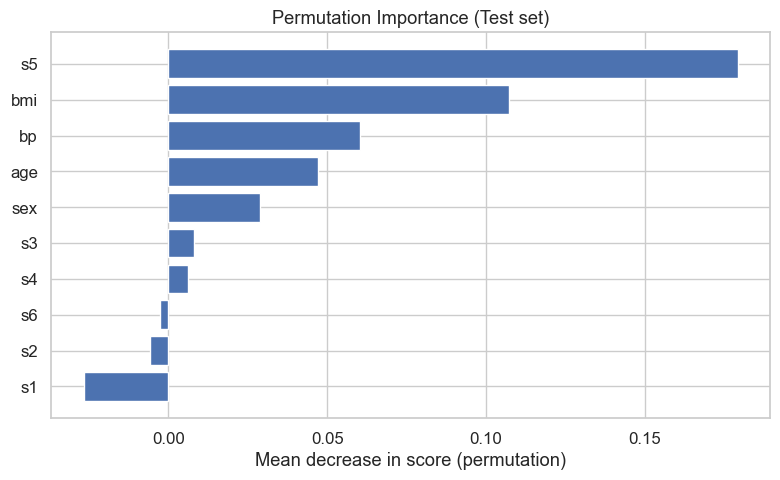


📌 STEP 7: INTERPRETATION & NEXT STEPS
Interpretation:
- Your model reduces MAE from baseline 65.76 to 52.54 (~20.1% better).
- Top model features (by model-based importance): s5, bmi, bp
- Consider: Hyperparameter tuning (learning_rate, n_estimators, max_depth), early stopping,
  testing LightGBM/XGBoost, and using SHAP for local explanations.

Done.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

sns.set(style="whitegrid", font_scale=1.1)

def section(title):
    print("\n" + "="*80)
    print(f"📌 {title}")
    print("="*80)

# Load data
data = datasets.load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# --- STEP 1: Inspect
section("STEP 1: DATA INSPECTION")
print("Dataset preview (first 5 rows):")
print(df.head().to_string(index=False))
print("\nSummary:")
print(df.describe().T[['count','mean','std','min','25%','50%','75%','max']])

# --- STEP 2: Train/test split
section("STEP 2: TRAIN/TEST SPLIT")
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"Total samples: {len(df)}  |  Train: {len(X_train)}  |  Test: {len(X_test)}")
print("Using 80% for training, 20% for testing (random_state=0)")

# --- STEP 3: Train
section("STEP 3: TRAIN MODEL")
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, random_state=0)
gbr.fit(X_train, y_train)
print("Trained GradientBoostingRegressor (n_estimators=500, learning_rate=0.1)")

# --- STEP 4: Evaluate
section("STEP 4: EVALUATION METRICS")
y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Baseline = mean predictor MAE (computed on full dataset for context)
baseline_mae = np.mean(np.abs(y - np.mean(y)))
improvement_pct = (baseline_mae - mae) / baseline_mae * 100

print(f"Mean target value          : {np.mean(y):.2f}")
print(f"Target std deviation       : {np.std(y):.2f}")
print(f"Baseline MAE (predict mean): {baseline_mae:.2f}")
print(f"Model MAE                  : {mae:.2f}")
print(f"Model RMSE                 : {rmse:.2f}")
print(f"Model R²                   : {r2:.3f}")
print(f"Improvement over baseline  : {improvement_pct:.1f}%")

# Optional: 5-fold cross-validated MAE (on whole dataset)
cv_mae = -np.mean(cross_val_score(GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=0),
                                  X, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1))
print(f"5-fold CV MAE (sample config): {cv_mae:.2f}")

# --- STEP 5: Feature importance (model-based) + neat horizontal barplot using matplotlib
section("STEP 5: FEATURE IMPORTANCE (MODEL-BASED)")
feat_imp = pd.Series(gbr.feature_importances_, index=X.columns).sort_values(ascending=True)
print(feat_imp.sort_values(ascending=False).to_string())

plt.figure(figsize=(8,5))
plt.barh(feat_imp.index, feat_imp.values)
plt.xlabel("Importance")
plt.title("Feature Importances (GradientBoostingRegressor)")
plt.tight_layout()
plt.show()

# --- STEP 6: Permutation importance (more reliable)
section("STEP 6: PERMUTATION IMPORTANCE (OPTIONAL BUT RECOMMENDED)")
perm = permutation_importance(gbr, X_test, y_test, n_repeats=30, random_state=0, n_jobs=-1)
perm_series = pd.Series(perm.importances_mean, index=X.columns).sort_values(ascending=False)
print("Permutation importance (mean over repeats):")
print(perm_series.to_string())

plt.figure(figsize=(8,5))
plt.barh(perm_series.sort_values().index, perm_series.sort_values().values)
plt.xlabel("Mean decrease in score (permutation)")
plt.title("Permutation Importance (Test set)")
plt.tight_layout()
plt.show()

# --- STEP 7: Short interpretation & next steps
section("STEP 7: INTERPRETATION & NEXT STEPS")
print("Interpretation:")
print(f"- Your model reduces MAE from baseline {baseline_mae:.2f} to {mae:.2f} (~{improvement_pct:.1f}% better).")
print("- Top model features (by model-based importance):", ", ".join(feat_imp.sort_values(ascending=False).index[:3]))
print("- Consider: Hyperparameter tuning (learning_rate, n_estimators, max_depth), early stopping,")
print("  testing LightGBM/XGBoost, and using SHAP for local explanations.")
print("\nDone.")
